In [45]:
from sklearn.cluster import KMeans
from sklearn.mixture import gaussian_mixture
import sklearn.datasets
import sklearn.decomposition
import sklearn.cluster
import sklearn.mixture
from sklearn import metrics
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
def purity_score(actual,predicted):
    mat = metrics.cluster.contingency_matrix(actual,predicted)
    a = np.sum(np.amax(mat,axis =0))/np.sum(mat)
    return a

In [6]:
def PCAA(dataframe):
    pca = PCA(n_components=2)
    newdata = pd.DataFrame(pca.fit_transform(dataframe))
    return newdata

In [117]:
def GMM(x,i,df):
    gmm = gaussian_mixture.GaussianMixture(n_components = i).fit(x)
    pred = gmm.predict(x)
    plt.scatter(x[:,0],x[:,1],c = pred,cmap = 'viridis')
    actual = df[yName]
    pty = purity_score(actual,pred)
    print("Purity Score of GMM: ",pty)
    plt.show()

In [125]:
def kmen(x,i,df):
    kmeans = KMeans(n_clusters = i,random_state = 42).fit(x)
    pred = kmeans.labels_
    centres = kmeans.cluster_centers_
    y_kmeans = kmeans.predict(x)
    plt.scatter(x[:,0],x[:,1],c = y_kmeans)
    plt.scatter(centres[:,0],centres[:,1],c="black",alpha = 1)
    plt.show()
    actual = df[yName]
    pty = purity_score(actual,pred)
    print("Purity Score of K-Means: ",pty)
    return kmeans.inertia_

In [9]:
def show_elbow_plot(x):
    model = KMeans()
    visualizer = KElbowVisualizer(model,k=(4,12))
    visualizer.fit(x)
    visualizer.show()

In [14]:
def load_dataset(path_to_file):
    df=pd.read_csv(path_to_file)
    return df

In [62]:
path = "./Iris.csv"
df = load_dataset(path)

In [63]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [81]:
yName = 'Species'
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

In [83]:
x = df.loc[:, features].values
y = df.loc[:,[yName]].values

principalDf = PCAA(x)
finalDf = pd.concat([principalDf, df[[yName]]], axis = 1)

featuresNew = finalDf.columns
featuresNew = featuresNew[:-1]
xNew = finalDf.loc[:, featuresNew].values
print(finalDf.head())

          0         1      Species
0 -2.684207  0.326607  Iris-setosa
1 -2.715391 -0.169557  Iris-setosa
2 -2.889820 -0.137346  Iris-setosa
3 -2.746437 -0.311124  Iris-setosa
4 -2.728593  0.333925  Iris-setosa


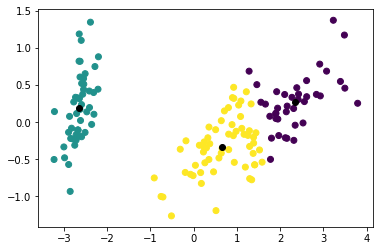

Purity Score of K-Means:  0.8866666666666667


63.87383806036228

In [126]:
kmen(xNew,3,finalDf)

Purity Score of GMM:  0.98


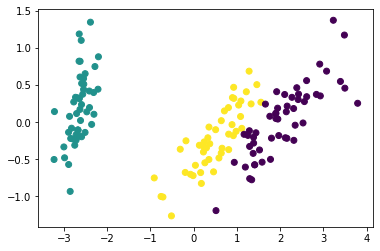

In [118]:
GMM(xNew,3,finalDf)

VALUE OF K:  2


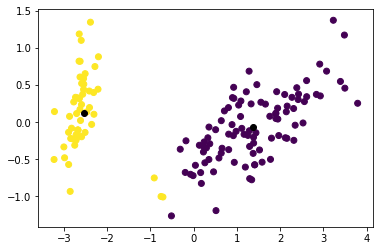

Purity Score of K-Means:  0.6666666666666666
Purity Score of GMM:  0.6666666666666666


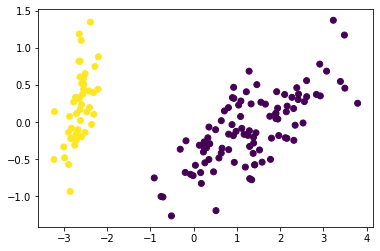

####################################

VALUE OF K:  3


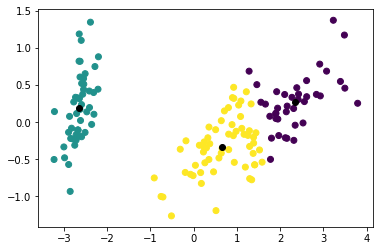

Purity Score of K-Means:  0.8866666666666667
Purity Score of GMM:  0.98


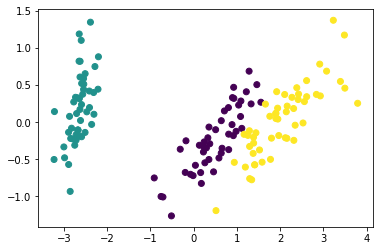

####################################

VALUE OF K:  4


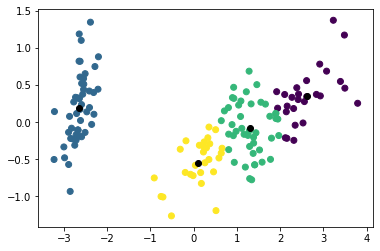

Purity Score of K-Means:  0.8466666666666667
Purity Score of GMM:  0.8866666666666667


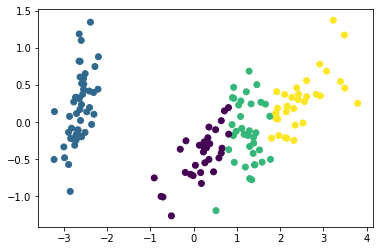

####################################

VALUE OF K:  5


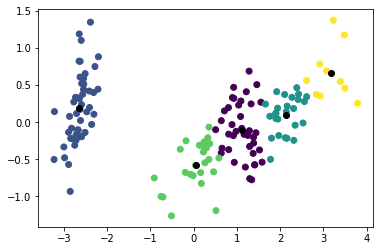

Purity Score of K-Means:  0.9066666666666666
Purity Score of GMM:  0.9


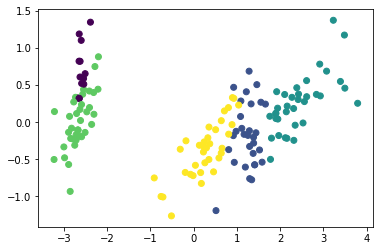

####################################

VALUE OF K:  6


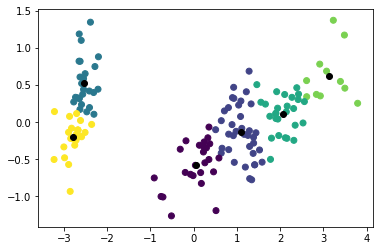

Purity Score of K-Means:  0.8933333333333333
Purity Score of GMM:  0.9066666666666666


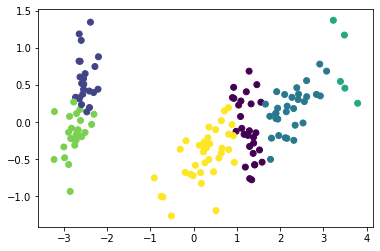

####################################

VALUE OF K:  7


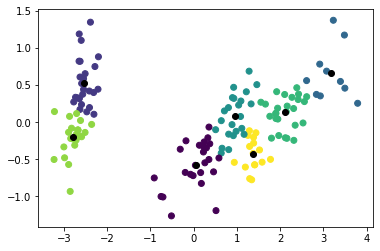

Purity Score of K-Means:  0.96
Purity Score of GMM:  0.96


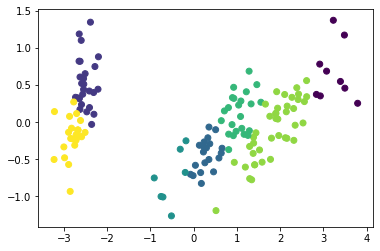

####################################



In [119]:
Ks = [2,3,4,5,6,7]
elbowK = []
elbowG =[]
for k in Ks:
    print("VALUE OF K: ", k)
    a = kmen(xNew,k,finalDf)
    elbowK.append(a)
    GMM(xNew,k,finalDf)
    #b = GMM(xNew,k,finalDf)
    print("####################################\n")

Elbow Plot for K-Means:


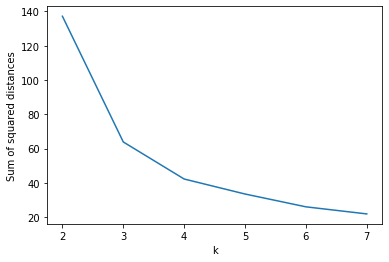

In [122]:
print("Elbow Plot for K-Means:")
plt.plot(Ks, elbowK)
plt.xlabel("k")
plt.ylabel("Sum of squared distances")
plt.show() ` 